In [9]:
#mount
import os
cwd = os.getcwd()
if cwd[0:2] != "C:":
    from google.colab import drive
    drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [10]:
import sys
root_dir="/content/gdrive/My Drive/Projects/flower"
sys.path.append(root_dir)

%cd "/content/gdrive/My Drive/Projects/flower/wm"

/content/gdrive/My Drive/Projects/flower/wm


In [11]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [12]:
import pandas as pd
import numpy as np
import datetime as dt
import importlib
import tradestats
import pandas as pd
from datetime import datetime
import sys

In [13]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [5]:
importlib.reload(tradestats)
from tradestats import *

NameError: name 'tradestats' is not defined

In [ ]:
importlib.reload(tradestats)
from tradestats import *
from tradestats import rose
prices = loaddata_1W('mbk_w.csv')

In [70]:
importlib.reload(tradestats)
from tradestats import *
from tradestats import rose

history = 10
ignore_max = 11
entry_max = ignore_max
#filenames = ['mbk_w.csv','mbk_d.csv','alr_w.csv','alr_d.csv','pko_w.csv','pko_d.csv','peo_w.csv','peo_d.csv','pkn_w.csv','pkn_d.csv']
filenames = ['mbk_w.csv']
progress = 0
progress_max = ((ignore_max)/2)*(ignore_max-1)*len(filenames)
stats = pd.DataFrame()

for filename in filenames:
  print('')
  print(filename)
  if '_d.'in filename:
    prices = loaddata_1D(filename)
  elif '_w.'in filename:
    prices = loaddata_1W(filename)
  else:
    print('file timeframe not supported')
    continue
#  for ignore in range(1,ignore_max):
#    for entry in range(ignore,entry_max):
  for ignore in range(2,3):
    for entry in range(4,5):
      periods = [2]
      dictList = []
      colFeat = []
      keyList = []
      roseDict   = rose(prices, periods,history,ignore,entry)
      dictList.append(roseDict.df); colFeat.append('rose'); keyList.append(periods)
      masterFrame = pd.DataFrame(index=prices.index)
      masterFrame[['year','date','close']] = prices[['year','date','close']]

      for i in range(0,len(dictList)):#iteracja po funkcjach
        for j in keyList[i]: #iteracja po okresach
          for k in list(dictList[i][j]): #iteracja po kolumnach danej funkcji w okresie
              colID = colFeat[i] + str(j) + k
              masterFrame[colID] = dictList[i][j][k]
      masterFrame = masterFrame.dropna()
      sum = masterFrame['rose2profit'].agg('sum')
      sum1990 = masterFrame.loc[(masterFrame.year>=1990) & (masterFrame.year<2000),'rose2profit'].agg('sum')
      sum2000 = masterFrame.loc[(masterFrame.year>=2000) & (masterFrame.year<2010),'rose2profit'].agg('sum')
      sum2010 = masterFrame.loc[(masterFrame.year>=2010) & (masterFrame.year<2020),'rose2profit'].agg('sum')
      sum2020 = masterFrame.loc[(masterFrame.year>=2020) & (masterFrame.year<2030),'rose2profit'].agg('sum')
      sumXX = masterFrame.loc[(masterFrame.year>=2000) & (masterFrame.year<2030),'rose2profit'].agg('sum')

      xx = masterFrame.groupby('year').rose2profit.agg('sum')
      df = xx.to_frame().T
      df.insert(loc=0, column='sum2020', value=[sum2020])
      df.insert(loc=0, column='sum2010', value=[sum2010])
      df.insert(loc=0, column='sum2000', value=[sum2000])
      df.insert(loc=0, column='sum1990', value=[sum1990])
      df.insert(loc=0, column='sumXX', value=[sumXX])
      df.insert(loc=0, column='sum', value=[sum])
      df.insert(loc=0, column='entry', value=[entry])
      df.insert(loc=0, column='ignore', value=[ignore])
      df.insert(loc=0, column='file', value=[filename])
      #df['ignore'] = ignore
      #df['entry'] = entry
      #df['file'] = filename
      df.reset_index(inplace = True, drop = True)
      if len(stats.index) == 0:
        stats = df
      else:
        stats = pd.concat([stats, df], ignore_index=True)
      progress +=1
      sys.stdout.write("\r%d%%" % round(progress/progress_max*100,0))
      sys.stdout.flush()




mbk_w.csv
34
2%

In [ ]:
stats

In [22]:
stats.to_csv(sep=';',path_or_buf='../Data/stats.csv',date_format="%Y-%m-%d",index = False,na_rep='')

In [68]:
masterFrame

,year,date,close,rose2rose,rose2uptick_date,rose2uptick_close,rose2uptick_diff,rose2downtick_date,rose2downtick_close,rose2downtick_diff,rose2entry,rose2open_trade,rose2close_trade,rose2open_trade_date,rose2open_trade_close,rose2profit
0,1992,1992-10-05,3.919933,1,1900-01-01,0.000000,0.000000,1900-01-01,0.000000,0.000000,0,0.000000,0.0,1900-01-01,0.0,0.0
1,1992,1992-10-12,3.600065,-2,1900-01-01,0.000000,0.000000,1900-01-01,0.000000,0.000000,0,0.000000,0.0,1900-01-01,0.0,0.0
2,1992,1992-10-19,4.339995,2,1900-01-01,0.000000,0.000000,1992-10-12,3.600065,0.205532,1,4.339995,0.0,1900-01-01,0.0,0.0
3,1992,1992-10-26,4.220030,-2,1992-10-19,4.339995,-0.027642,1992-10-12,3.600065,0.172209,0,0.000000,0.0,1900-01-01,0.0,0.0
4,1992,1992-11-02,4.200015,-2,1992-10-19,4.339995,-0.032254,1992-10-12,3.600065,0.166650,0,0.000000,0.0,1900-01-01,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,2024,2024-01-22,506.800000,0,2023-12-18,548.000000,-0.075182,2024-01-15,499.300000,0.015021,0,0.000000,0.0,1900-01-01,0.0,0.0
1634,2024,2024-01-29,559.200000,2,2023-11-27,573.800000,-0.025444,2024-01-15,499.300000,0.119968,1,559.200000,0.0,1900-01-01,0.0,0.0
1635,2024,2024-02-05,546.400000,-2,2024-01-29,559.200000,-0.022890,2024-01-15,499.300000,0.094332,0,0.000000,0.0,1900-01-01,0.0,0.0
1636,2024,2024-02-12,629.400000,2,1900-01-01,0.000000,0.000000,2024-02-05,546.400000,0.151903,1,0.000000,0.0,1900-01-01,0.0,0.0


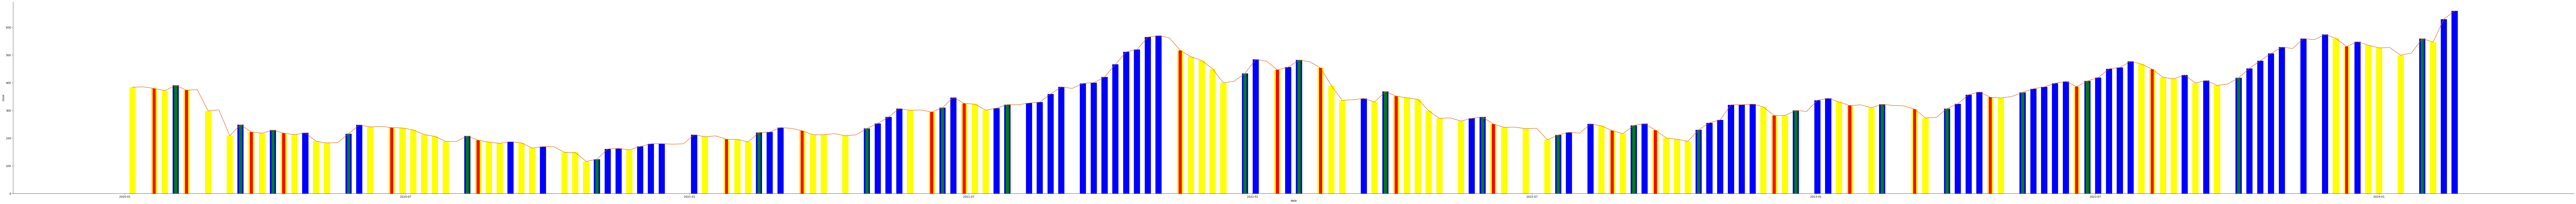

In [73]:
# @title date vs close

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['close']
  ys1= series['rose2open_trade']
  ys2= series['rose2close_trade']
  ys3= series['rose2rosehigh']
  ys4= series['rose2roselow']

  plt.plot(xs, ys, label=series_name, color=palette[1])
  plt.bar(xs, ys3, label=series_name, color='blue', width = 4)
  plt.bar(xs, ys4, label=series_name, color='yellow', width = 4)
  plt.bar(xs, ys1, label=series_name, color='green', width = 2)
  plt.bar(xs, ys2, label=series_name, color='red', width = 2)


fig, ax = plt.subplots(figsize=(130, 10.2), layout='constrained')
masterFrame1 = masterFrame.loc[masterFrame.year>=2020]
df_sorted = masterFrame1.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('close')

In [ ]:
# prices.dropna(inplace=True)
masterFrame = pd.DataFrame(index=prices.index)
#masterFrame[['id','year','month','day','date','weekday','open','high','low','close','volume']] = prices[['id','year','month','day','date','weekday','open','high','low','close','volume']]
masterFrame[['year','date','close']] = prices[['year','date','close']]

In [ ]:
for i in range(0,len(dictList)):#iteracja po funkcjach
    for j in keyList[i]: #iteracja po okresach
        for k in list(dictList[i][j]): #iteracja po kolumnach danej funkcji w okresie
            colID = colFeat[i] + str(j) + k
            masterFrame[colID] = dictList[i][j][k]

In [ ]:
masterFrame = masterFrame.dropna()

In [ ]:
masterFrame#.tail(100)

,year,date,close,rose2rose,rose2uptick_date,rose2uptick_close,rose2uptick_diff,rose2downtick_date,rose2downtick_close,rose2downtick_diff,rose2entry,rose2open_trade_date,rose2open_trade_close,rose2profit
0,1992,1992-10-05,3.919933,1,1900-01-01,0.000000,0.000000,1900-01-01,0.000000,0.000000,0,1900-01-01,0.0,0.0
1,1992,1992-10-12,3.600065,-2,1900-01-01,0.000000,0.000000,1900-01-01,0.000000,0.000000,0,1900-01-01,0.0,0.0
2,1992,1992-10-19,4.339995,2,1900-01-01,0.000000,0.000000,1992-10-12,3.600065,0.205532,1,1900-01-01,0.0,0.0
3,1992,1992-10-26,4.220030,-2,1992-10-19,4.339995,-0.027642,1992-10-12,3.600065,0.172209,0,1900-01-01,0.0,0.0
4,1992,1992-11-02,4.200015,-2,1992-10-19,4.339995,-0.032254,1992-10-12,3.600065,0.166650,0,1900-01-01,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,2024,2024-01-01,525.600000,-2,2023-12-18,548.000000,-0.040876,1900-01-01,0.000000,0.000000,0,1900-01-01,0.0,0.0
1631,2024,2024-01-08,526.600000,0,2023-12-18,548.000000,-0.039051,2024-01-01,525.600000,0.001903,0,1900-01-01,0.0,0.0
1632,2024,2024-01-15,499.300000,-2,2023-12-18,548.000000,-0.088869,1900-01-01,0.000000,0.000000,-1,1900-01-01,0.0,0.0
1633,2024,2024-01-22,506.800000,0,2023-12-18,548.000000,-0.075182,2024-01-15,499.300000,0.015021,0,1900-01-01,0.0,0.0


In [ ]:
xx = masterFrame.groupby('year').rose2profit.agg('sum')

In [ ]:
xx

year
1992   -0.133626
1993    2.405860
1994    0.897425
1995    0.252366
1996    0.072739
1997   -0.247984
1998    0.776744
1999    0.204119
2000   -0.098078
2001   -0.248301
2002   -0.153606
2003    0.310914
2004   -0.016397
2005    0.163426
2006    0.092362
2007    0.965556
2008   -0.398703
2009    0.970405
2010   -0.066743
2011   -0.153570
2012    0.069098
2013    0.419331
2014   -0.306175
2015   -0.177605
2016   -0.097134
2017    0.130127
2018   -0.138907
2019    0.002819
2020   -0.333350
2021    1.406444
2022   -0.010812
2023    0.581544
2024    0.000000
Name: rose2profit, dtype: float64

In [ ]:
df = xx.to_frame().T

In [ ]:
df

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
rose2profit,-0.133626,2.40586,0.897425,0.252366,0.072739,-0.247984,0.776744,0.204119,-0.098078,-0.248301,...,-0.177605,-0.097134,0.130127,-0.138907,0.002819,-0.33335,1.406444,-0.010812,0.581544,0.0


In [ ]:
df.reset_index(inplace = True, drop = True)

In [ ]:
df

year,file,ignore,entry,sum,1992,1993,1994,1995,1996,1997,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,mbk_w.csv,10,10,0.228832,0.0,1.892872,0.934047,-0.192952,0.944369,-0.247984,...,-0.384633,-0.073952,0.0,-0.00121,-0.088292,-0.298343,0.514436,-0.366781,0.273406,0.106114


In [ ]:
df2 = df.copy()

In [ ]:
df_row_merged = pd.concat([df, df2], ignore_index=True)

In [ ]:
df_row_merged

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2018,2019,2020,2021,2022,2023,2024,ignore,entry,file
0,-0.133626,2.40586,0.897425,0.252366,0.072739,-0.247984,0.776744,0.204119,-0.098078,-0.248301,...,-0.138907,0.002819,-0.33335,1.406444,-0.010812,0.581544,0.0,1,1,mbk_w.csv
1,-0.133626,2.40586,0.897425,0.252366,0.072739,-0.247984,0.776744,0.204119,-0.098078,-0.248301,...,-0.138907,0.002819,-0.33335,1.406444,-0.010812,0.581544,0.0,1,1,mbk_w.csv


In [ ]:
masterFrame.loc[masterFrame.year>=2022,'rose2profit'].agg('sum')

0.01273927468477426

In [ ]:
masterFrame['rose2profit'].agg('sum')

5.743466877721712

In [ ]:
masterFrame.to_csv(sep=';',path_or_buf='../Data/stats.csv',date_format="%Y-%m-%d",index = False,na_rep='')

rose2profit   -0.133626
Name: 1992, dtype: float64

In [ ]:
importlib.reload(tradestats)
from tradestats import *
starttime = datetime.now()
# alltrades = preparetrades_brut_tsl(masterFrame,[1],[0.001,0.002,0.003,0.004,0.005,0.006],[0.001,0.002,0.003,0.004,0.005,0.006],[0.001,0.002,0.003,0.004,0.005,0.006],2016,2017)
alltrades = preparetrades_brut_tp(masterFrame,[1],[0.001,0.002,0.003,0.004,0.005,0.006],[0.001,0.002,0.003,0.004,0.005,0.006],2016,2017)
endtime = datetime.now()
print(str(endtime - starttime))

In [ ]:
importlib.reload(tradestats)
from tradestats import *
trades = cleartrades_brut(alltrades.copy(),True)
# trades,alltrades = preparetrades(masterFrame,[-1,1],[5],[13],[0.002],True)

In [ ]:
#____________________________________________________________________________________________________________________
#
#
alltrades.head(2)

In [ ]:
importlib.reload(tradestats)
from tradestats import *
stats1 = runstats_brut_v3(alltrades)